# Actividad PBL 1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importar librerías 

In [2]:
import pandas as pd 
import numpy as np 

from sklearn.model_selection import train_test_split

# Data
from google.colab import drive 
drive.mount('/content/drive')

# Visualización
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Warnings
import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Carga y análisis de base de datos 

In [4]:
spam_dataset = pd.read_csv('/content/drive/Shareddrives/Analisis Incertidumbre (PEDRO)/spam.csv', encoding = 'latin-1')
spam_dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
spam_dataset.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)
spam_dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
spam_dataset.rename(columns = {'v1': 'Categoría', 'v2': 'Mensaje'}, inplace = True)

print(spam_dataset.shape)
spam_dataset.head()

(5572, 2)


,Categoría,Mensaje
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
spam_dataset['Categoría'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: Categoría, dtype: float64

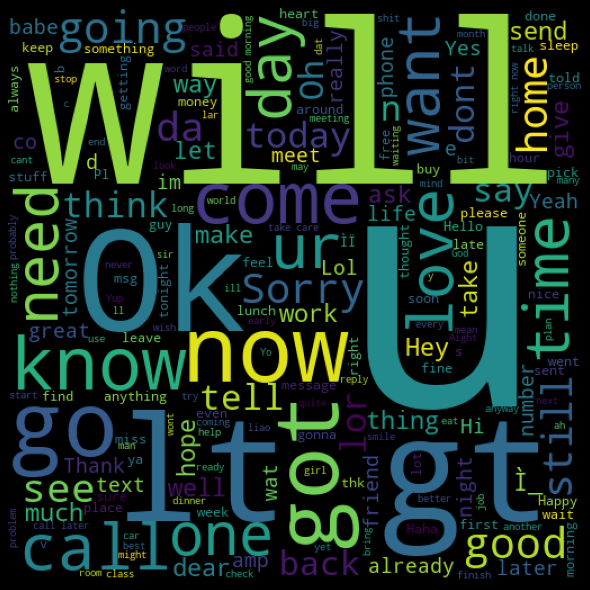

In [8]:
ham_words = ' '.join(list(spam_dataset[spam_dataset['Categoría'] == "ham"]['Mensaje']))
ham_wc = WordCloud(width = 512,height = 512).generate(ham_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

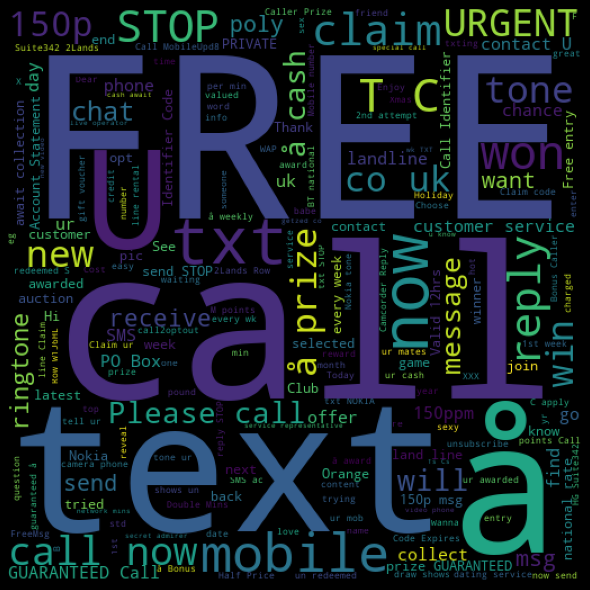

In [9]:
spam_words = ' '.join(list(spam_dataset[spam_dataset['Categoría'] == "spam"]['Mensaje']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

## Entrenamiento del clasificador

In [10]:
# Randomize the dataset
data_randomized = spam_dataset.sample(frac=1, random_state=1)

# Calculate index for split
training_test_index = round(len(data_randomized) * 0.8)

#training_set = pd.DataFrame({'Mensaje': X_train, 'Categoría': y_train})
#test_set = pd.DataFrame({'Mensaje': X_test, 'Categoría': y_test})

# Split into training and test sets
training_set = data_randomized[:training_test_index].reset_index(drop=True)
test_set = data_randomized[training_test_index:].reset_index(drop=True)

print(training_set.shape)
print(test_set.shape)

(4458, 2)
(1114, 2)


In [11]:
training_set['Categoría'].value_counts(normalize=True)

ham     0.864065
spam    0.135935
Name: Categoría, dtype: float64

In [12]:
test_set['Categoría'].value_counts(normalize=True)

ham     0.873429
spam    0.126571
Name: Categoría, dtype: float64

In [13]:
training_set.head()

,Categoría,Mensaje
0,ham,Convey my regards to him
1,ham,"[Û_] anyway, many good evenings to u! s"
2,ham,My sort code is and acc no is . The bank is n...
3,ham,Sorry i din lock my keypad.
4,spam,"Hi babe its Chloe, how r u? I was smashed on s..."


In [14]:
training_set['Mensaje'] = training_set['Mensaje'].str.replace('\W', ' ')
training_set['Mensaje'] = training_set['Mensaje'].str.lower()
training_set.head()

,Categoría,Mensaje
0,ham,convey my regards to him
1,ham,û_ anyway many good evenings to u s
2,ham,my sort code is and acc no is the bank is n...
3,ham,sorry i din lock my keypad
4,spam,hi babe its chloe how r u i was smashed on s...


In [15]:
training_set['Mensaje'] = training_set['Mensaje'].str.split()

vocabulary = []
for sms in training_set['Mensaje']:
   for word in sms:
      vocabulary.append(word)

vocabulary = list(set(vocabulary))

In [16]:
len(vocabulary)

7766

In [17]:
word_counts_per_sms = {unique_word: [0] * len(training_set['Mensaje']) for unique_word in vocabulary}

for index, sms in enumerate(training_set['Mensaje']):
   for word in sms:
      word_counts_per_sms[word][index] += 1

In [18]:
word_counts = pd.DataFrame(word_counts_per_sms)
word_counts.head()

,neville,causes,o2,calls1,ranjith,optout,bone,ceri,grr,ring,...,strt,joys,cps,ma,harder,railway,pickle,bless,sort,constantly
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
training_set_clean = pd.concat([training_set, word_counts], axis=1)
training_set_clean.head()

,Categoría,Mensaje,neville,causes,o2,calls1,ranjith,optout,bone,ceri,...,strt,joys,cps,ma,harder,railway,pickle,bless,sort,constantly
0,ham,"[convey, my, regards, to, him]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ham,"[û_, anyway, many, good, evenings, to, u, s]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ham,"[my, sort, code, is, and, acc, no, is, the, ba...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,ham,"[sorry, i, din, lock, my, keypad]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,spam,"[hi, babe, its, chloe, how, r, u, i, was, smas...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Isolating spam and ham messages first
spam_messages = training_set_clean[training_set_clean['Categoría'] == 'spam']
ham_messages = training_set_clean[training_set_clean['Categoría'] == 'ham']

# P(Spam) and P(Ham)
p_spam = len(spam_messages) / len(training_set_clean)
p_ham = len(ham_messages) / len(training_set_clean)

# N_Spam
n_words_per_spam_message = spam_messages['Mensaje'].apply(len)
n_spam = n_words_per_spam_message.sum()

# N_Ham
n_words_per_ham_message = ham_messages['Mensaje'].apply(len)
n_ham = n_words_per_ham_message.sum()

# N_Vocabulary
n_vocabulary = len(vocabulary)

# Laplace smoothing
alpha = 1

In [21]:
# Initiate parameters
parameters_spam = {unique_word:0 for unique_word in vocabulary}
parameters_ham = {unique_word:0 for unique_word in vocabulary}

# Calculate parameters
for word in vocabulary:
   n_word_given_spam = spam_messages[word].sum() # spam_messages already defined
   p_word_given_spam = (n_word_given_spam + alpha) / (n_spam + alpha*n_vocabulary)
   parameters_spam[word] = p_word_given_spam

   n_word_given_ham = ham_messages[word].sum() # ham_messages already defined
   p_word_given_ham = (n_word_given_ham + alpha) / (n_ham + alpha*n_vocabulary)
   parameters_ham[word] = p_word_given_ham

In [22]:
import re

def classify(message):
   '''
   message: a string
   '''

   message = re.sub('\W', ' ', message)
   message = message.lower().split()

   p_spam_given_message = p_spam
   p_ham_given_message = p_ham

   for word in message:
      if word in parameters_spam:
         p_spam_given_message *= parameters_spam[word]

      if word in parameters_ham: 
         p_ham_given_message *= parameters_ham[word]

   print('P(Spam|message):', p_spam_given_message)
   print('P(Ham|message):', p_ham_given_message)

   if p_ham_given_message > p_spam_given_message:
      print('Label: Ham')
   elif p_ham_given_message < p_spam_given_message:
      print('Label: Spam')
   else:
      print('Equal probabilities, have a human classify this!')

In [24]:
classify('WINNER!! This is the secret code to unlock the money: C3421.')


P(Spam|message): 7.551469020619691e-26
P(Ham|message): 3.13163390665657e-27
Label: Spam


In [25]:
classify("Sounds good, Tom, then see u there")

P(Spam|message): 4.914731817244035e-25
P(Ham|message): 4.052730830087535e-21
Label: Ham


In [26]:
def classify_test_set(message):
   '''
   message: a string
   '''

   message = re.sub('\W', ' ', message)
   message = message.lower().split()

   p_spam_given_message = p_spam
   p_ham_given_message = p_ham

   for word in message:
      if word in parameters_spam:
         p_spam_given_message *= parameters_spam[word]

      if word in parameters_ham:
         p_ham_given_message *= parameters_ham[word]

   if p_ham_given_message > p_spam_given_message:
      return 'ham'
   elif p_spam_given_message > p_ham_given_message:
      return 'spam'
   else:
      return 'needs human classification'

In [27]:
test_set['predicted'] = test_set['Mensaje'].apply(classify_test_set)
test_set.head()

,Categoría,Mensaje,predicted
0,ham,S...from the training manual it show there is ...,ham
1,spam,Do you want a new Video phone? 600 anytime any...,spam
2,ham,True. Its easier with her here.,ham
3,ham,Midnight at the earliest,ham
4,ham,"All done, all handed in. Don't know if mega sh...",ham


In [28]:
correct = 0
total = test_set.shape[0]

for row in test_set.iterrows():
   row = row[1]
   if row['Categoría'] == row['predicted']:
      correct += 1

print('Correct:', correct)
print('Incorrect:', total - correct)
print('Accuracy:', correct/total)

Correct: 1107
Incorrect: 7
Accuracy: 0.9937163375224417
